In [ ]:
#Goal:
To predict energy consumption based on various weather and temporal features.

#Target Variable:
Assuming the column containing energy consumption is named something like energy_consumption or similar (we'll confirm during EDA).

#Problem Type:
 Regression — because we're predicting a continuous numeric value (energy consumed).

#Household energy consumption enriched with weather data in northeast of Mexico

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
# Load the data
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (9)\Household energy consumption enriched with weather data in northeast of Mexico\energy_weather_raw_data.csv")



In [9]:
# Step 1: View the first few rows
print(df.head())


                  date  active_power  current  voltage  reactive_power  \
0  2022-11-05 14:05:00         265.1     2.53    122.2          159.09   
1  2022-11-05 14:06:00         265.1     2.53    122.2          159.09   
2  2022-11-05 14:07:00         265.1     2.53    122.2          159.09   
3  2022-11-05 14:08:00         640.0     5.45    120.7          152.08   
4  2022-11-05 14:09:00         257.6     2.47    122.4          158.26   

   apparent_power  power_factor   main description   temp  feels_like  \
0          309.17        0.8575  Clear   clear sky  24.19       23.68   
1          309.17        0.8575  Clear   clear sky  24.19       23.68   
2          309.17        0.8575  Clear   clear sky  24.19       23.68   
3          657.82        0.9729  Clear   clear sky  24.19       23.68   
4          302.33        0.8520  Clear   clear sky  24.19       23.68   

   temp_min  temp_max  pressure  humidity  speed  deg  temp_t+1  \
0     23.44      27.5      1013        39    0.0 

In [11]:
# Step 2: Data shape and types
print(df.shape)
print(df.dtypes)


(605260, 19)
date               object
active_power      float64
current           float64
voltage           float64
reactive_power    float64
apparent_power    float64
power_factor      float64
main               object
description        object
temp              float64
feels_like        float64
temp_min          float64
temp_max          float64
pressure            int64
humidity            int64
speed             float64
deg                 int64
temp_t+1          float64
feels_like_t+1    float64
dtype: object


In [15]:

print(df.describe())

        active_power        current        voltage  reactive_power  \
count  605260.000000  605260.000000  605260.000000   605260.000000   
mean      286.019377       2.587303     125.417300      132.538007   
std       189.545683       1.591395       4.390612       71.030254   
min        24.400000       0.300000     107.600000        4.730000   
25%       159.800000       1.610000     122.600000       74.070000   
50%       250.300000       2.290000     124.400000      128.500000   
75%       365.400000       3.220000     129.500000      177.652500   
max      2900.000000      24.410000     135.500000     1293.580000   

       apparent_power   power_factor           temp     feels_like  \
count   605260.000000  605260.000000  605260.000000  605260.000000   
mean       321.839271       0.854202      19.525256      18.712625   
std        191.743962       0.114629       6.607351       6.722516   
min         37.140000       0.201800      -5.560000      -6.130000   
25%        203.5800

In [17]:
#  Check for missing values
print(df.isnull().sum())

date              0
active_power      0
current           0
voltage           0
reactive_power    0
apparent_power    0
power_factor      0
main              0
description       0
temp              0
feels_like        0
temp_min          0
temp_max          0
pressure          0
humidity          0
speed             0
deg               0
temp_t+1          0
feels_like_t+1    0
dtype: int64


In [19]:
#  Check for duplicate rows
print(df.duplicated().sum())

2


In [27]:
df[df.duplicated()]


,date,active_power,current,voltage,reactive_power,apparent_power,power_factor,main,description,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg,temp_t+1,feels_like_t+1
5124,2022-11-09 03:36:00,179.4,1.55,125.7,76.01,194.84,0.9208,Clear,clear sky,14.25,13.58,14.25,14.25,1016,71,2.05,148,14.81,13.86
5883,2022-11-09 16:16:00,265.0,2.45,121.0,132.88,296.45,0.8939,Clear,clear sky,25.09,24.78,24.81,26.95,1018,43,6.17,340,22.81,22.50


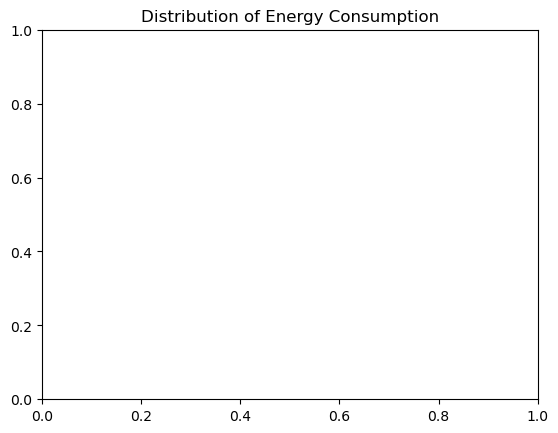

In [31]:
#  Visualize target variable

plt.title('Distribution of Energy Consumption')
plt.show()

In [65]:
# Optional: Drop 'description' if it's text (non-numeric)
df = df.drop(columns=['description'], errors='ignore')

In [61]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])


In [63]:
# Create time features (optional)
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

In [ ]:
#Machine learning #active_power → This is the variable you want to predict (continuous value).

#Problem Statement:
#Predict the active power consumption using weather and electrical sensor data.
#Problem Type:
#Regression → because active_power is a continuous numerical value.
##Household energy consumption enriched with weather data in northeast of Mexico



In [33]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [69]:
# Drop 'active_power' and 'date' to create feature matrix
X = df.drop(['active_power', 'date'], axis=1)


In [71]:
# Target variable
y = df['active_power']

In [45]:
print(df.columns)

Index(['date', 'active_power', 'current', 'voltage', 'reactive_power',
       'apparent_power', 'power_factor', 'main', 'description', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'speed',
       'deg', 'temp_t+1', 'feels_like_t+1'],
      dtype='object')


In [53]:
print(df.columns.tolist())

['date', 'active_power', 'current', 'voltage', 'reactive_power', 'apparent_power', 'power_factor', 'main', 'description', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'speed', 'deg', 'temp_t+1', 'feels_like_t+1']


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [85]:
# Drop 'description' if it's still present
if 'description' in df.columns:
    df = df.drop(columns=['description'])


In [87]:
X = df.drop(['active_power', 'date'], axis=1)
y = df['active_power']

In [95]:
print(df.dtypes)

date              datetime64[ns]
active_power             float64
current                  float64
voltage                  float64
reactive_power           float64
apparent_power           float64
power_factor             float64
main                      object
temp                     float64
feels_like               float64
temp_min                 float64
temp_max                 float64
pressure                   int64
humidity                   int64
speed                    float64
deg                        int64
temp_t+1                 float64
feels_like_t+1           float64
hour                       int32
dayofweek                  int32
dtype: object


In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['main'] = le.fit_transform(df['main'])  # Convert strings to integers

In [109]:
X = df.drop(['active_power', 'date'], axis=1)
y = df['active_power']

In [123]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [125]:
# Predict & evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.9999520355367955
RMSE: 1.3128426293214255


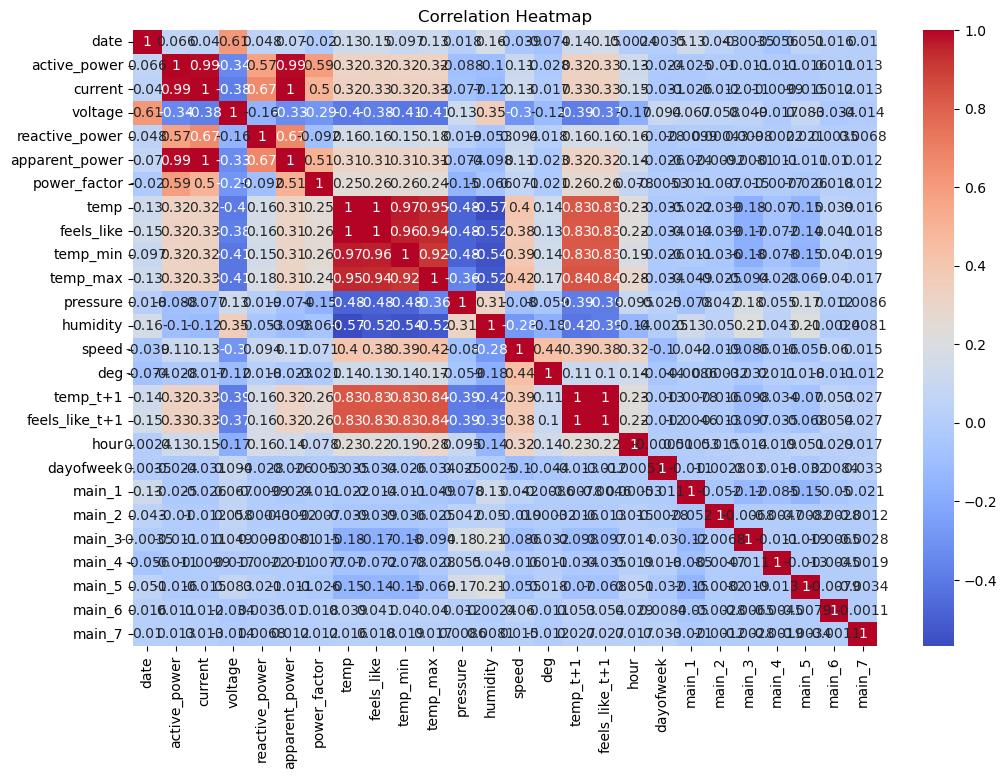

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

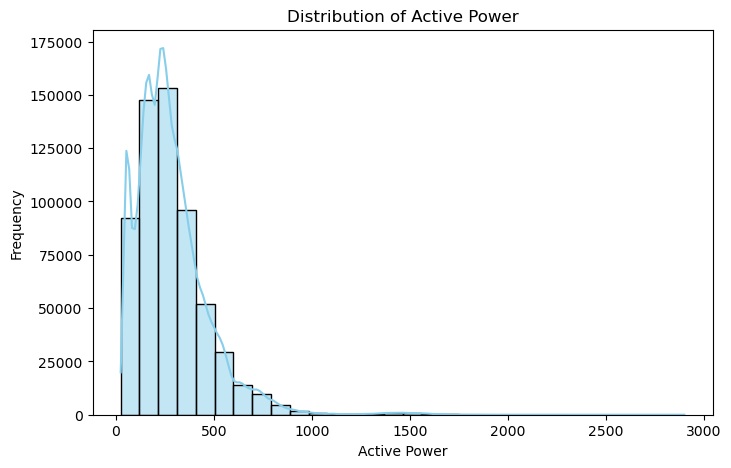

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['active_power'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Active Power')
plt.xlabel('Active Power')
plt.ylabel('Frequency')
plt.show()

In [131]:
# Feature importance from Random Forest
importances = model.feature_importances_
features = X.columns

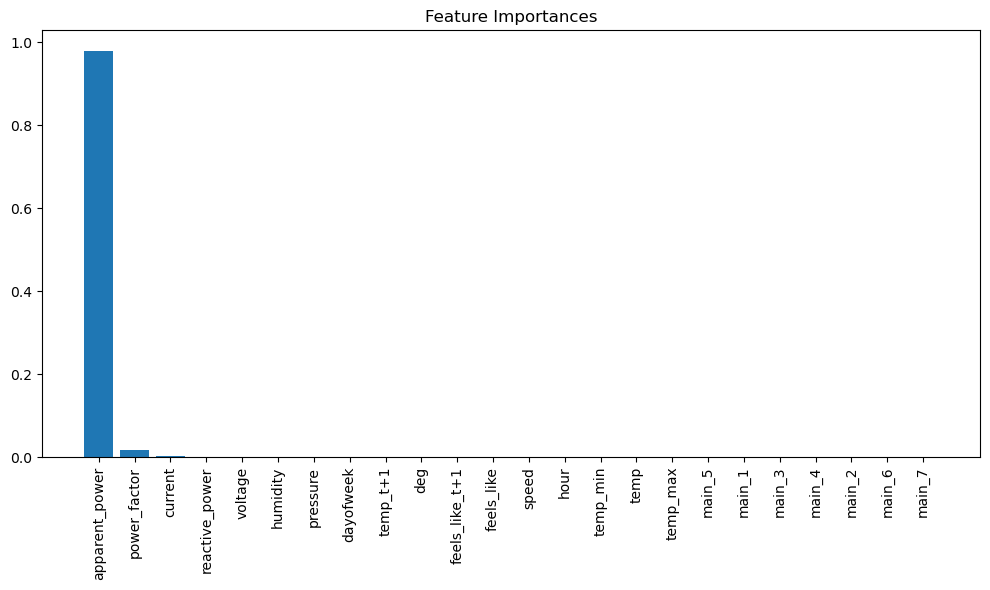

In [133]:
# Sort
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()